# Linear regression with one feature

## *. Setup

In [ ]:
%pip install numpy pandas matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True)

## *. Load a dataset

In [2]:
M = [0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4]
L = [0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0]

In [3]:
x = np.array([M])
y = np.array([L])

## 1. Visualize the data

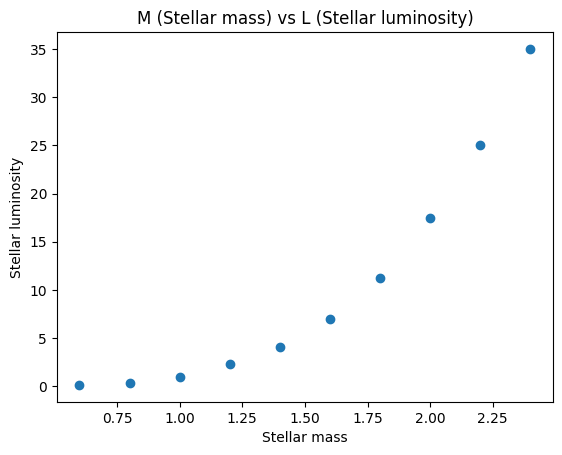

In [7]:
plt.figure()
plt.scatter(x, y)
plt.xlabel("Stellar mass")
plt.ylabel("Stellar luminosity")
plt.title("M (Stellar mass) vs L (Stellar luminosity)")
plt.show()

It is observed that the points do not follow a straight line, but rather form an upward curve as mass increases.

This behavior is consistent with what is known in astrophysics, where the luminosity of a star generally increases faster than its mass. Therefore, it is expected that a simple linear regression model, which assumes a linear relationship, will not adequately fit these data.

Consequently, to model this relationship more accurately, it would be better to use methods that can capture nonlinearity, such as polynomial regression or logarithmic transformations applied to the data to linearize it. This would allow for a more representative fit of the physical relationship between stellar mass and luminosity.

## 2. Model and loss

### 2.1 Prediction

In [5]:
def predict(x, w, b):
    """Compute the predicted y values for given x, using f_{w,b}(x) = w x + b."""
    return w * x + b

w_test = 0.0
b_test = 0.0
y_hat_test = predict(x, w_test, b_test)
print("First 5 predictions with w=0, b=0:", y_hat_test[:5])

First 5 predictions with w=0, b=0: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### 2.2 Mean Squared Error (MSE)

$$
\mathrm{MSE} = \frac{1}{m} \sum_{i=1}^{m} \big(y_i - \hat{y}_i\big)^2
$$

In [6]:
def mean_squared_error(y_true, y_pred):
    """Calculate the Mean Squared Error between true and predicted values."""
    return np.mean((y_true - y_pred) ** 2)

y_hat_test = predict(x, w_test, b_test)
mse_test = mean_squared_error(y, y_hat_test)
print("MSE with w=0, b=0:", mse_test)

MSE with w=0, b=0: 235.3935


## 3. Cost function $J(w, b)$

In [7]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    y_hat = w * x + b  # f_{w,b}(x)
    errors = y_hat - y
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    return cost

print("Cost with w=0, b=0:", compute_cost(x, y, w_test, b_test))

Cost with w=0, b=0: 1176.9675


### 3.1 Visualize the cost function as a surface

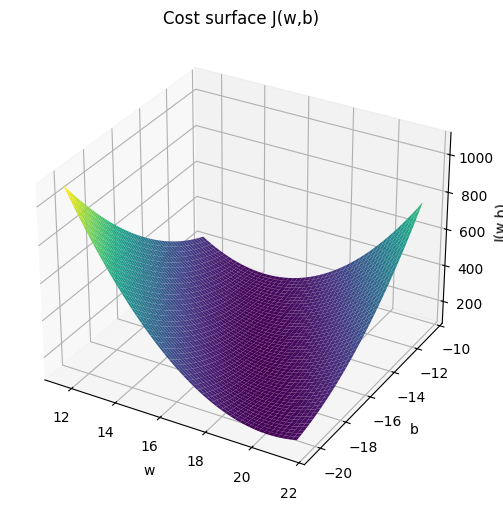

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

w_values = np.linspace(11.5, 21.5, 50)
b_values = np.linspace(-20.5, -10.5, 50)

W, B = np.meshgrid(w_values, b_values)
J_vals = np.zeros_like(W)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        J_vals[i, j] = compute_cost(x, y, W[i, j], B[i, j])

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, J_vals, cmap=cm.viridis, linewidth=0, antialiased=True)
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("J(w,b)")
ax.set_title("Cost surface J(w,b)")
plt.show()

To define the grid of values ​​for $w$ and $b$ where the cost function was evaluated, $w$ and $b$ were first estimated visually from the graph. Using two points, the slope was calculated as $w = \frac{17.5 - 1.0}{2.0 - 1.0} = 16.5$ and the intercept as $b = 1.0 - 16.5 \cdot 1.0 = -15.5$.

To ensure that the minimum of the cost function was within the grid, a range of ±5 around these values ​​was chosen, as this was a sufficiently wide margin to cover possible variations without making the grid too large. Furthermore, 50 points were used in each dimension to balance detail and computational efficiency.

The minimum of the cost function represents the values ​​of $w$ and $b$ that best fit the line to the data, that is, the optimal combination of slope and intercept that most closely approximates the relationship between stellar mass and luminosity.

## 4. Gradients

**Cost derivatives for linear regression**

The derivation starts from the definition of the mean squared error (MSE) cost function for linear regression:

$$
J(w,b) = \frac{1}{2m} \sum_{i=1}^{m} \big(f_{w,b}(x_i) - y_i\big)^2
$$

where $f_{w,b}(x_i) = w x_i + b$ represents the prediction for observation $i$, and $m$ is the total number of observations.

- **Derivative with respect to $w$**

Using the chain rule:

$$
\frac{\partial}{\partial w} (f_{w,b}(x_i) - y_i)^2
= 2 (f_{w,b}(x_i) - y_i)\frac{\partial f_{w,b}(x_i)}{\partial w}
$$

Since $\frac{\partial f_{w,b}(x_i)}{\partial w} = x_i$, this becomes:

$$
\frac{\partial}{\partial w} (f_{w,b}(x_i) - y_i)^2
= 2 (f_{w,b}(x_i) - y_i)x_i
$$

Summing over all observations and multiplying by $\frac{1}{2m}$:

$$
\frac{\partial J}{\partial w}
= \frac{1}{m} \sum_{i=1}^{m} (f_{w,b}(x_i) - y_i)x_i
$$

- **Derivative with respect to $b$**

Similarly, differentiating with respect to $b$, and noting that $\frac{\partial f_{w,b}(x_i)}{\partial b} = 1$:

$$
\frac{\partial}{\partial b} (f_{w,b}(x_i) - y_i)^2
= 2 (f_{w,b}(x_i) - y_i)
$$

Summing over all observations and multiplying by $\frac{1}{2m}$:

$$
\frac{\partial J}{\partial b}
= \frac{1}{m} \sum_{i=1}^{m} (f_{w,b}(x_i) - y_i)
$$

- These derivatives are used to update the parameters $w$ and $b$ using gradient descent:

$$
w := w - \alpha \frac{\partial J}{\partial w}, \quad
b := b - \alpha \frac{\partial J}{\partial b}
$$

where $\alpha$ is the learning rate.

## 5. Gradient descent (non-vectorized)

In [9]:
def compute_gradients(x_list, y_list, w, b):
    """Compute dJ/dw and dJ/db using explicit loops."""
    m_local = len(x_list)
    sum_dw = 0.0
    sum_db = 0.0

    for i in range(m_local):
        f_wb = w * x_list[i] + b
        error = f_wb - y_list[i]
        sum_dw += error * x_list[i]
        sum_db += error

    dj_dw = sum_dw / m_local
    dj_db = sum_db / m_local
    return dj_dw, dj_db

dj_dw_test, dj_db_test = compute_gradients(x, y, w_test, b_test)
print("Gradients at w=0, b=0:", dj_dw_test, dj_db_test)

Gradients at w=0, b=0: [ -0.09  -0.28  -1.    -2.76  -5.74 -11.2  -20.16 -35.   -55.   -84.  ] [ -0.15  -0.35  -1.    -2.3   -4.1   -7.   -11.2  -17.5  -25.   -35.  ]


## 6. Gradient descent (vectorized)

In [10]:
def compute_gradients(x, y, w, b):
    m = x.shape[0]
    y_hat = w * x + b  # f_{w,b}(x)
    errors = y_hat - y


    dj_dw = (1 / m) * np.sum(errors * x)
    dj_db = (1 / m) * np.sum(errors)
    return dj_dw, dj_db

dj_dw_test, dj_db_test = compute_gradients(x, y, w_test, b_test)
print("Gradients at w=0, b=0:", dj_dw_test, dj_db_test)

Gradients at w=0, b=0: -215.23 -103.6


## 7. Plot the cost over iterations

In [12]:
def gradient_descent(x, y, w_init, b_init, alpha, num_iterations):
    w = w_init
    b = b_init
    history = []

    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradients(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = compute_cost(x, y, w, b)
        history.append((i, cost))

        if i % max(1, (num_iterations // 10)) == 0:
            print(f"Iteration {i:4d}: w={w:7.4f}, b={b:7.4f}, cost={cost:8.4f}")

    return w, b, history

alpha = 0.01
num_iterations = 2000

w_init = 0.0
b_init = 0.0

w_learned, b_learned, history = gradient_descent(x, y, w_init, b_init, alpha, num_iterations)
print("\nLearned parameters:")
print("w =", w_learned)
print("b =", b_learned)


Iteration    0: w= 2.1523, b= 1.0360, cost=704.9695
Iteration  200: w=16.3146, b=-13.8270, cost=103.7971
Iteration  400: w=17.8595, b=-16.3867, cost= 98.0816
Iteration  600: w=18.0899, b=-16.7685, cost= 97.9544
Iteration  800: w=18.1243, b=-16.8255, cost= 97.9515
Iteration 1000: w=18.1294, b=-16.8340, cost= 97.9515
Iteration 1200: w=18.1302, b=-16.8352, cost= 97.9515
Iteration 1400: w=18.1303, b=-16.8354, cost= 97.9515
Iteration 1600: w=18.1303, b=-16.8354, cost= 97.9515
Iteration 1800: w=18.1303, b=-16.8355, cost= 97.9515

Learned parameters:
w = 18.130302963272232
b = -16.835454434392684


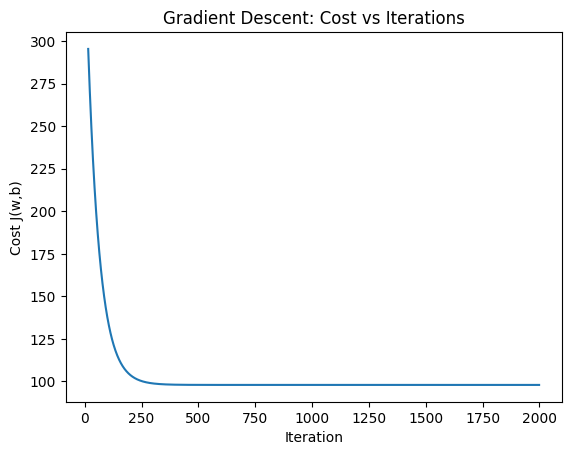

In [13]:
iterations = [it for it, c in history]
costs = [c for it, c in history]

plt.figure()
plt.plot(iterations[15:], costs[15:])  
plt.xlabel("Iteration")
plt.ylabel("Cost J(w,b)")
plt.title("Gradient Descent: Cost vs Iterations")
plt.show()

The graph with $alpha=0.01$ shows rapid convergence during the first iterations and good stability, validating that the learning rate is adequate. The cost reaches a stable minimum value around iteration 500 and stops decreasing; however, the fact that the cost does not approach zero indicates that, although the optimization process was successful, a linear model is insufficient to capture the true relationship between stellar mass and luminosity.

## 8. Experiments

With alpha=0.001

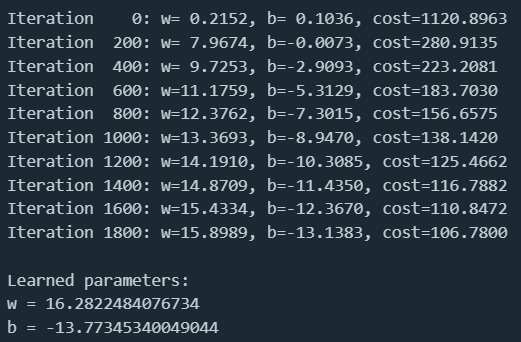

With alpha=0.01

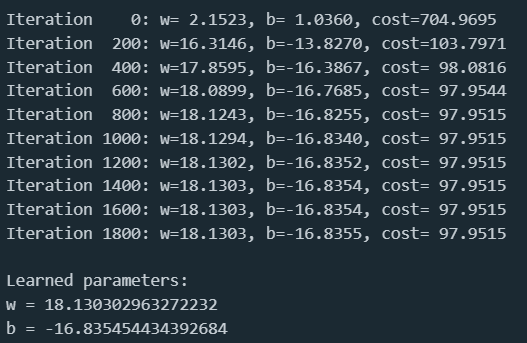

With alpha=0.05

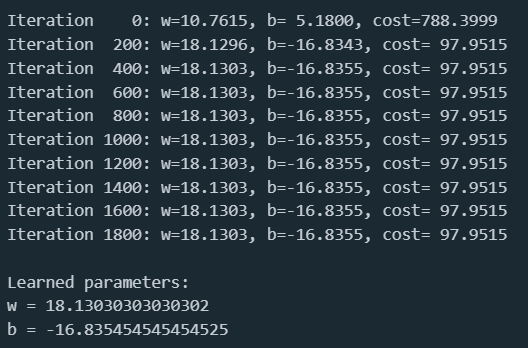

With alpha=0.055

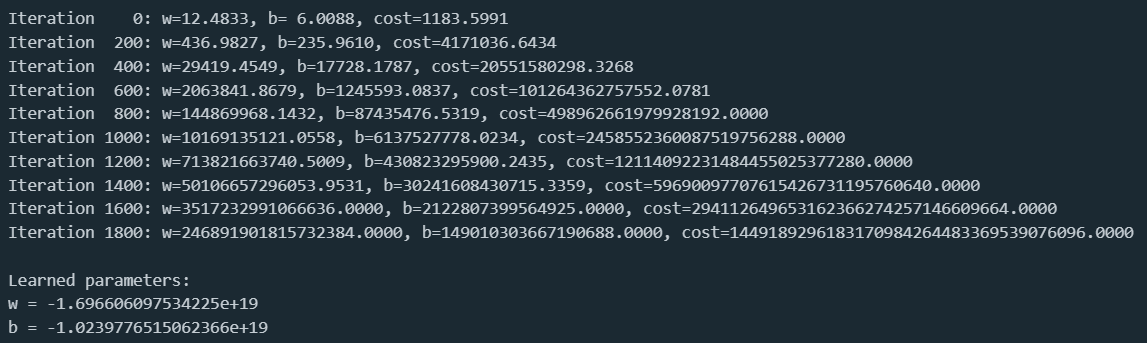

## 9. Final fit plot

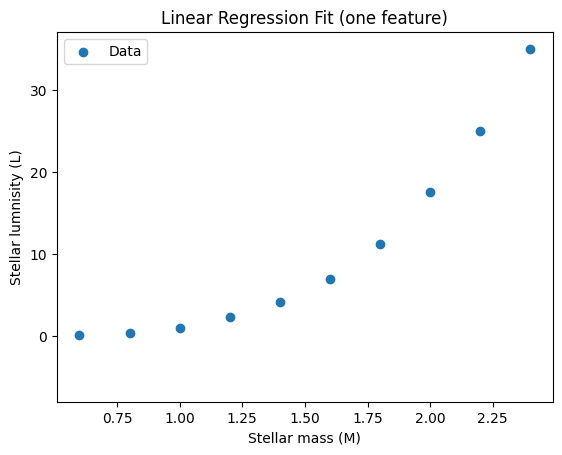

In [14]:
plt.figure()
plt.scatter(x, y, label="Data")
y_pred = predict(x, w_learned, b_learned)
plt.plot(x, y_pred)
plt.xlabel("Stellar mass (M)")
plt.ylabel("Stellar lumnisity (L)")
plt.title("Linear Regression Fit (one feature)")
plt.legend()
plt.show()

The regression line exists mathematically but is not shown in the graph because the data forms a curve and is small, which generates systematic errors such as underestimating luminosity in small masses and overestimating it in large masses, showing that a linear model of a single feature does not correctly capture the mass-luminosity relationship.

## 10. Conceptual questions

- Astrophysical meaning of w:

The parameter w represents how stellar luminosity changes with mass, that is, the slope of the mass-luminosity relationship. 

- Why is a linear model limited here?

A linear model is limited because the actual relationship is not linear, as observed in the graph "M (Stellar mass) vs L (Stellar luminosity)" and now in the linear regression graph. Luminosity increases faster than mass, especially in more massive stars, so the straight line does not capture the curve of the data.